In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("h1b_dataset.csv", encoding = "ISO-8859-1")

C:\Users\Ron\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,...,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
0,24,2,2016,1,10,2016,H1B,DISCOVER PRODUCTS INC,IL,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
1,4,3,2016,1,10,2016,H1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,...,2015.0,WILLIS TOWERS WATSON SURVEY,53000.0,57200.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
2,10,3,2016,1,10,2016,H1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,DC,20007,CERTIFIEDWITHDRAWN
3,28,9,2016,1,10,2016,H1B,INFO SERVICES LLC,MI,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,NJ,7302,WITHDRAWN
4,22,2,2015,2,10,2016,H1B,BBandT CORPORATION,NC,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,132500.0,0.0,Year,N,N,NY,10036,CERTIFIEDWITHDRAWN


In [4]:
#extract samples with labels: denined/certified
df_binary = df.loc[df['CASE_STATUS'] == 'DENIED']
df_binary.shape

(6983, 27)

In [5]:
df_binary = df_binary.append(df.loc[df['CASE_STATUS'] == 'CERTIFIED'])
df_binary.shape

(475952, 27)

In [6]:
#number of samples with label=DENIED
n_denied = len(df_binary[df_binary.CASE_STATUS == 'DENIED'])
n_denied

6983

In [7]:
df_final = pd.DataFrame()
df_final = df_binary.loc[df_binary.CASE_STATUS == 'CERTIFIED'].sample(n_denied).append(df_binary.loc[df_binary.CASE_STATUS=='DENIED'])

In [8]:
print("Number of DENIED samples:",list(df_final['CASE_STATUS']).count('DENIED'))
print("Number of CERTIFIED samples:", list(df_final['CASE_STATUS']).count('CERTIFIED'))
df_final.shape

Number of DENIED samples: 6983
Number of CERTIFIED samples: 6983


(13966, 27)

In [9]:
# df_final.to_csv('h1b_binary.csv')

In [10]:
df_final['VISA_CLASS'].value_counts()

H1B               13079
E3 Australian       767
H1B1 Chile           67
H1B1 Singapore       53
Name: VISA_CLASS, dtype: int64

In [11]:
df_final = df_final[df_final.VISA_CLASS == 'H1B']
df_final.shape

(13079, 27)

In [12]:
def rescale_wage(value, type_):
    
    v = value
    
    if type_ == 'Month':
        v *= 12    
    if type_ == 'Week':
        v *= 52
    if type_ == 'Hour':
        v *= 40 * 52
    if type_ == 'Bi-Weekly':
        v *= 26 
    return v
        

In [13]:
# columns to be rescaled
# WAGE_UNIT_OF_PAY
# PW_UNIT_OF_PAY

df_final['PREVAILING_WAGE'] = df_final[['PREVAILING_WAGE', 'PW_UNIT_OF_PAY']]\
                    .apply(lambda x: rescale_wage(x['PREVAILING_WAGE'], x['PW_UNIT_OF_PAY']), axis=1)

df_final['WAGE_RATE_OF_PAY_FROM'] = df_final[['WAGE_RATE_OF_PAY_FROM', 'WAGE_UNIT_OF_PAY']]\
                    .apply(lambda x: rescale_wage(x['WAGE_RATE_OF_PAY_FROM'], x['WAGE_UNIT_OF_PAY']), axis=1)

print(df_final['WAGE_RATE_OF_PAY_FROM'].head())
print(df_final['PREVAILING_WAGE'].head())

95581      61000.0
81680      75000.0
157896    104333.0
16485      41713.0
375979    125000.0
Name: WAGE_RATE_OF_PAY_FROM, dtype: float64
95581      50170.0
81680      55619.0
157896    104333.0
16485      41434.0
375979    124987.0
Name: PREVAILING_WAGE, dtype: float64


In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13079 entries, 95581 to 528112
Data columns (total 27 columns):
CASE_SUBMITTED_DAY       13079 non-null int64
CASE_SUBMITTED_MONTH     13079 non-null int64
CASE_SUBMITTED_YEAR      13079 non-null int64
DECISION_DAY             13079 non-null int64
DECISION_MONTH           13079 non-null int64
DECISION_YEAR            13079 non-null int64
VISA_CLASS               13079 non-null object
EMPLOYER_NAME            13075 non-null object
EMPLOYER_STATE           13079 non-null object
EMPLOYER_COUNTRY         13079 non-null object
SOC_NAME                 13079 non-null object
NAICS_CODE               13077 non-null float64
TOTAL_WORKERS            13079 non-null int64
FULL_TIME_POSITION       13077 non-null object
PREVAILING_WAGE          13079 non-null float64
PW_UNIT_OF_PAY           13058 non-null object
PW_SOURCE                13058 non-null object
PW_SOURCE_YEAR           13059 non-null float64
PW_SOURCE_OTHER          13079 non-null obje

In [15]:
df_final.head()

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,...,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
95581,29,12,2016,5,1,2017,H1B,SYNTEL CONSULTING INC,MI,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,61000.0,0.0,Year,Y,N,TN,38017,CERTIFIED
81680,15,12,2016,21,12,2016,H1B,DECISIONWAVE TECHNOLOGIES INC,NH,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,75000.0,0.0,Year,Y,N,NY,12211,CERTIFIED
157896,9,2,2017,15,2,2017,H1B,CHARLES SCHWAB AND COMPANY INC,CO,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,104333.0,0.0,Year,N,N,CO,80124,CERTIFIED
16485,12,10,2016,18,10,2016,H1B,MEDICAL UNIVERSITY OF SOUTH CAROLINA,SC,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,41713.0,0.0,Year,N,N,SC,29425,CERTIFIED
375979,21,3,2017,27,3,2017,H1B,DATAMEER INC,CA,UNITED STATES OF AMERICA,...,2016.0,OFLC ONLINE DATA CENTER,125000.0,145000.0,Year,N,N,NY,10003,CERTIFIED


In [16]:
#columns to be removed:
# EMPLOYER_COUNTRY
# CASE_SUBMITTED_DAY
# CASE_SUBMITTED_MONTH
# CASE_SUBMITTED_YEAR
# DECISION_DAY
# DECISION_MONTH
# DECISION_YEAR
# EMPLOYER_COUNTRY
# NAICS_CODE
# PW_UNIT_OF_PAY
# PW_SOURCE
# PW_SOURCE_YEAR
# PW_SOURCE_OTHER
# WAGE_RATE_OF_PAY_TO (most of the values missing)
# WILLFUL_VIOLATOR
# H-1B_DEPENDENT
# WORKSITE_POSTAL_CODE
# EMPLOYER_STATE
# WORKSITE_STATE

df_final = df_final.drop(columns=['EMPLOYER_COUNTRY', 'CASE_SUBMITTED_DAY', 'CASE_SUBMITTED_MONTH', 'CASE_SUBMITTED_YEAR',
'DECISION_DAY', 'DECISION_MONTH', 'DECISION_YEAR', 'EMPLOYER_COUNTRY', 'NAICS_CODE', 'PW_UNIT_OF_PAY', 'PW_SOURCE',
'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER', 'WAGE_RATE_OF_PAY_TO', 'WILLFUL_VIOLATOR', 'WORKSITE_POSTAL_CODE',
                            'EMPLOYER_STATE', 'VISA_CLASS', 'WORKSITE_STATE', 'WAGE_UNIT_OF_PAY'])
print(df_final.shape)

(13079, 8)


In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13079 entries, 95581 to 528112
Data columns (total 8 columns):
EMPLOYER_NAME            13075 non-null object
SOC_NAME                 13079 non-null object
TOTAL_WORKERS            13079 non-null int64
FULL_TIME_POSITION       13077 non-null object
PREVAILING_WAGE          13079 non-null float64
WAGE_RATE_OF_PAY_FROM    13079 non-null float64
H-1B_DEPENDENT           13078 non-null object
CASE_STATUS              13079 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 919.6+ KB


In [18]:
df_final.dropna(inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13072 entries, 95581 to 528112
Data columns (total 8 columns):
EMPLOYER_NAME            13072 non-null object
SOC_NAME                 13072 non-null object
TOTAL_WORKERS            13072 non-null int64
FULL_TIME_POSITION       13072 non-null object
PREVAILING_WAGE          13072 non-null float64
WAGE_RATE_OF_PAY_FROM    13072 non-null float64
H-1B_DEPENDENT           13072 non-null object
CASE_STATUS              13072 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 919.1+ KB


In [19]:
df_final[df_final['TOTAL_WORKERS']>15][['TOTAL_WORKERS','EMPLOYER_NAME']]

,TOTAL_WORKERS,EMPLOYER_NAME
482585,20,MINDTREE LIMITED
54894,30,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION
426770,30,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION
235592,30,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION
154211,25,CISCO SYSTEMS INC
279484,20,MPHASIS CORPORATION
202361,50,EGENCIA LLC
202608,20,GILEAD SCIENCES INC
168641,30,DELOITTE CONSULTING LLP
328164,20,MPHASIS CORPORATION


In [20]:
df_final.nunique()

EMPLOYER_NAME            6936
SOC_NAME                   54
TOTAL_WORKERS              26
FULL_TIME_POSITION          2
PREVAILING_WAGE          4627
WAGE_RATE_OF_PAY_FROM    4237
H-1B_DEPENDENT              2
CASE_STATUS                 2
dtype: int64

In [21]:
df_final['CASE_STATUS'].value_counts()

CERTIFIED    6852
DENIED       6220
Name: CASE_STATUS, dtype: int64

In [22]:
import seaborn as sns
sns.countplot(df_final['CASE_STATUS'])

In [23]:
# new features/columns
# diff_wage_prevail
df_final['diff_wage_prevailing'] = df_final.apply(lambda x: x['PREVAILING_WAGE'] - x['WAGE_RATE_OF_PAY_FROM'], axis=1)

#combined employer+soc_name/position
# df_final['combined_empl_soc'] = df_final.apply(lambda x: x['EMPLOYER_NAME'] + "_" + x['SOC_NAME'], axis=1)

In [24]:
#df_final.diff_wage_prevailing

In [25]:
# df_final['combined_empl_soc']

In [26]:
# columns to be converted in numerical range
# EMPLOYER_NAME
# SOC_NAME
# FULL_TIME_POSITION

In [27]:
# FULL_TIME_POSITION : Y = 1, N = 0
df_final.replace({'FULL_TIME_POSITION' : { 'Y' : 1, 'N' : 0}}, inplace=True)
# df_final['FULL_TIME_POSITION'].head()

# H1B dependent: Y=1, N=0
df_final.replace({'H-1B_DEPENDENT' : { 'Y' : 1, 'N' : 0}}, inplace=True)

#WILLFUL_VIOLATOR: Y=1, N=0
# df_final.replace({'WILLFUL_VIOLATOR' : { 'Y' : 1, 'N' : 0}}, inplace=True)

df_final.head()

,EMPLOYER_NAME,SOC_NAME,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,H-1B_DEPENDENT,CASE_STATUS,diff_wage_prevailing
95581,SYNTEL CONSULTING INC,DOCTORS,1,1,50170.0,61000.0,1,CERTIFIED,-10830.0
81680,DECISIONWAVE TECHNOLOGIES INC,ANALYSTS,1,1,55619.0,75000.0,1,CERTIFIED,-19381.0
157896,CHARLES SCHWAB AND COMPANY INC,COMPUTER OCCUPATION,1,1,104333.0,104333.0,0,CERTIFIED,0.0
16485,MEDICAL UNIVERSITY OF SOUTH CAROLINA,ENGINEERS,1,1,41434.0,41713.0,0,CERTIFIED,-279.0
375979,DATAMEER INC,COMPUTER OCCUPATION,1,1,124987.0,125000.0,0,CERTIFIED,-13.0


In [28]:
# EMPLOYER_NAME: 
print(len(set(df_final.EMPLOYER_NAME.value_counts())))

#SOC_NAME
len(set(df_final.SOC_NAME.value_counts()))

44


41

In [29]:
# from sklearn.preprocessing import OneHotEncoder

In [30]:
# Deal with outliers

df_outl = df_final[df_final.PREVAILING_WAGE < 150000]
df_outl = df_outl[df_outl.WAGE_RATE_OF_PAY_FROM < 150000]
sorted(df_outl['PREVAILING_WAGE'], reverse=True)

[149573.0,
 149160.0,
 149011.0,
 148013.0,
 147908.8,
 147846.0,
 147846.0,
 147846.0,
 147846.0,
 147846.0,
 147357.0,
 147222.0,
 147222.0,
 147222.0,
 147222.0,
 147222.0,
 147222.0,
 147222.0,
 147222.0,
 147126.0,
 146702.0,
 146476.0,
 146058.0,
 146058.0,
 145746.0,
 145210.0,
 145210.0,
 144961.0,
 144851.0,
 144776.0,
 144776.0,
 144602.0,
 144347.0,
 144347.0,
 144347.0,
 144140.0,
 143938.0,
 143790.0,
 143562.0,
 143562.0,
 143458.0,
 143257.0,
 143126.0,
 143109.0,
 142938.0,
 142938.0,
 142938.0,
 142938.0,
 142938.0,
 142938.0,
 142938.0,
 142938.0,
 142938.0,
 142618.0,
 142605.0,
 142596.0,
 142596.0,
 142403.0,
 141835.0,
 141419.0,
 141003.0,
 140754.0,
 140675.0,
 140192.0,
 140109.0,
 140000.0,
 139838.0,
 139318.0,
 139298.0,
 138965.0,
 138965.0,
 138965.0,
 138965.0,
 138923.0,
 138715.0,
 138636.0,
 138507.0,
 138154.0,
 137999.0,
 137821.0,
 137682.0,
 137571.0,
 137390.0,
 136906.0,
 136906.0,
 136906.0,
 136906.0,
 136760.0,
 136760.0,
 136573.0,
 136573.0,

In [31]:
# df_outl.to_csv('h1b_preprocessed_all_features.csv')

X = df_outl.drop(columns = ['CASE_STATUS'])
y = df_outl['CASE_STATUS']


In [32]:
#X_encoded.to_csv('cleaned_data.csv',index = False)

In [33]:
X_encoded = pd.get_dummies(X)#categorical_cols['SOC_NAME'])


In [34]:
# for col in X_encoded.columns[6:]:
#     X_encoded[col] = X_encoded[col].apply(lambda x: col + '_yes' if x == 1 else col + '_no')

In [35]:
#X.head()

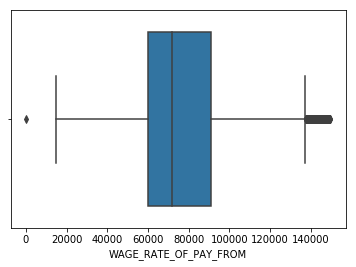

In [36]:
sns.boxplot(X_encoded['WAGE_RATE_OF_PAY_FROM'])

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

x_transformed = MinMaxScaler().fit_transform(X_encoded)

C:\Users\Ron\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [38]:
df_trans = pd.DataFrame(x_transformed, columns=X_encoded.columns)
print(df_trans.shape)
df_trans.tail()

(12335, 6631)


,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,H-1B_DEPENDENT,diff_wage_prevailing,EMPLOYER_NAME_1199 SEIU UNITED HEALTHCARE WORKERS EAST,EMPLOYER_NAME_1787 FINANCIAL CORPORATION INC,EMPLOYER_NAME_1A DISTRIBUTION INC,EMPLOYER_NAME_1HQ USA LLC,...,SOC_NAME_PUBLIC RELATIONS,SOC_NAME_REAL ESTATE,SOC_NAME_RELIGIOUS WORKERS,SOC_NAME_REPORTERS AND CORRESPONDENTS,SOC_NAME_SALES AND RELATED WORKERS,SOC_NAME_SCIENTIST,SOC_NAME_SOCIAL WORKERS,SOC_NAME_SURVEYORS,SOC_NAME_TRANSPORTATION,SOC_NAME_WRITERS EDITORS AND AUTHORS
12330,0.0,1.0,0.519399,0.567802,1.0,0.414202,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12331,0.0,1.0,0.510079,0.509646,0.0,0.445206,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12332,0.0,1.0,0.299680,0.299426,0.0,0.445206,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12333,0.0,1.0,0.610899,0.605291,1.0,0.448437,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12334,0.0,1.0,0.509577,0.511022,0.0,0.444014,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# pd.DataFrame(df_trans).to_csv('h1b_normalized_all_features.csv')

print(df_trans['H-1B_DEPENDENT'].value_counts())
# print(df_trans['WILLFUL_VIOLATOR'].value_counts())

0.0    8645
1.0    3690
Name: H-1B_DEPENDENT, dtype: int64


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_trans, y, random_state=0, test_size=0.3)

X_test.shape

(3701, 6631)

In [41]:
# Feature importance using RandomForests
from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report as cr
from sklearn.metrics import accuracy_score as accu
import numpy as np
import matplotlib.pyplot as plt

### Feature Importance using RandomForests

In [42]:
rf_clf = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
features = X_train.columns
importances = rf_clf.feature_importances_

# top 70 features give best accuracy (combined_empl_soc was not included)
indices = np.argsort(importances)[::-1][:20]

importances[indices]

array([0.12443372, 0.09047346, 0.06984553, 0.06386605, 0.05705204,
       0.03191592, 0.02573377, 0.01696563, 0.01529666, 0.01436794,
       0.01235496, 0.01110716, 0.00588926, 0.00532605, 0.00515069,
       0.00472312, 0.00465867, 0.00399911, 0.00368573, 0.00344518])

In [44]:
# Print the names of the most important features

feat_labels = X_encoded.columns
imp_features = []

for feature_list_index in indices:
    imp_features.append(feat_labels[feature_list_index])
    
len(imp_features)

20

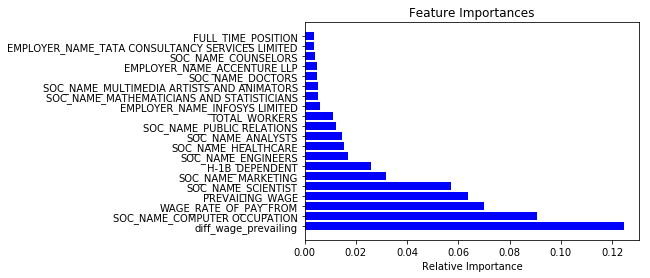

In [45]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [46]:
# X_encoded[imp_features].to_csv('h1b_preprocessed_imp_features.csv')
# len(imp_features)

In [47]:
# pd.DataFrame(x_transformed)[imp_features].to_csv('h1b_normalized_imp_features.csv')
# len(imp_features)

In [48]:
#extract important features
X_imp_train = X_train[imp_features]
X_imp_test = X_test[imp_features]

### Applying models

In [49]:
#using imp features
clf_rf = RandomForestClassifier(n_estimators=100)

preds = clf_rf.fit(X_imp_train, y_train).predict(X_imp_test)
print(cr(y_test, preds))

print(accu(y_test, preds))

              precision    recall  f1-score   support

   CERTIFIED       0.80      0.84      0.82      1936
      DENIED       0.81      0.76      0.79      1765

   micro avg       0.80      0.80      0.80      3701
   macro avg       0.80      0.80      0.80      3701
weighted avg       0.80      0.80      0.80      3701

0.803566603620643


In [50]:
#using all features
clf_rf = RandomForestClassifier(n_estimators=100)

preds = clf_rf.fit(X_train, y_train).predict(X_test)

print(cr(y_test, preds))

print(accu(y_test, preds))

              precision    recall  f1-score   support

   CERTIFIED       0.82      0.90      0.86      1936
      DENIED       0.87      0.79      0.83      1765

   micro avg       0.85      0.85      0.85      3701
   macro avg       0.85      0.84      0.84      3701
weighted avg       0.85      0.85      0.84      3701

0.8451769791948122


In [51]:
from sklearn import svm

preds_svm = svm.LinearSVC().fit(X_train, y_train).predict(X_test)

print(cr(y_test, preds_svm))

print(accu(y_test, preds_svm))

              precision    recall  f1-score   support

   CERTIFIED       0.79      0.87      0.83      1936
      DENIED       0.84      0.75      0.79      1765

   micro avg       0.81      0.81      0.81      3701
   macro avg       0.82      0.81      0.81      3701
weighted avg       0.81      0.81      0.81      3701

0.8116725209402864


In [52]:
# from sklearn import svm

preds_svm = svm.LinearSVC().fit(X_imp_train, y_train).predict(X_imp_test)

print(cr(y_test, preds_svm))

print(accu(y_test, preds_svm))

              precision    recall  f1-score   support

   CERTIFIED       0.77      0.86      0.81      1936
      DENIED       0.82      0.72      0.77      1765

   micro avg       0.79      0.79      0.79      3701
   macro avg       0.80      0.79      0.79      3701
weighted avg       0.79      0.79      0.79      3701

0.7911375303971899


In [53]:
# preds_svm = svm.SVC(kernel='rbf').fit(X_imp_train, y_train).predict(X_imp_test)

# print(cr(y_test, preds_svm))

# print(accu(y_test, preds_svm))

In [54]:
from sklearn.naive_bayes import MultinomialNB

preds_mnb = MultinomialNB().fit(X_imp_train, y_train).predict(X_imp_test)

print(cr(y_test, preds_mnb))

print(accu(y_test, preds_mnb))

              precision    recall  f1-score   support

   CERTIFIED       0.75      0.85      0.79      1936
      DENIED       0.80      0.68      0.74      1765

   micro avg       0.77      0.77      0.77      3701
   macro avg       0.78      0.77      0.77      3701
weighted avg       0.77      0.77      0.77      3701

0.769521750878141


In [55]:
# from sklearn.naive_bayes import MultinomialNB

preds_mnb = MultinomialNB().fit(X_train, y_train).predict(X_test)

print(cr(y_test, preds_mnb))

print(accu(y_test, preds_mnb))

              precision    recall  f1-score   support

   CERTIFIED       0.77      0.90      0.83      1936
      DENIED       0.87      0.70      0.77      1765

   micro avg       0.80      0.80      0.80      3701
   macro avg       0.82      0.80      0.80      3701
weighted avg       0.81      0.80      0.80      3701

0.8049175898405836


In [56]:
from sklearn.neighbors import KNeighborsClassifier as knn

preds_knn = knn().fit(X_imp_train, y_train).predict(X_imp_test)

print(cr(y_test, preds_knn))

print(accu(y_test, preds_knn))

              precision    recall  f1-score   support

   CERTIFIED       0.77      0.84      0.80      1936
      DENIED       0.81      0.73      0.76      1765

   micro avg       0.79      0.79      0.79      3701
   macro avg       0.79      0.78      0.78      3701
weighted avg       0.79      0.79      0.79      3701

0.7868143744933802


In [57]:
# from sklearn.neighbors import KNeighborsClassifier as knn

preds_knn = knn().fit(X_train, y_train).predict(X_test)

print(cr(y_test, preds_knn))

print(accu(y_test, preds_knn))

              precision    recall  f1-score   support

   CERTIFIED       0.78      0.86      0.81      1936
      DENIED       0.82      0.73      0.77      1765

   micro avg       0.80      0.80      0.80      3701
   macro avg       0.80      0.79      0.79      3701
weighted avg       0.80      0.80      0.79      3701

0.7960010807889759


In [58]:
# Neural Network
from sklearn.neural_network import MLPClassifier as mlp

preds_mlp = mlp(batch_size=128, learning_rate='adaptive').fit(X_train, y_train).predict(X_test)

print(cr(y_test, preds_mlp))

print(accu(y_test, preds_mlp))

              precision    recall  f1-score   support

   CERTIFIED       0.79      0.84      0.81      1936
      DENIED       0.81      0.75      0.78      1765

   micro avg       0.80      0.80      0.80      3701
   macro avg       0.80      0.80      0.80      3701
weighted avg       0.80      0.80      0.80      3701

0.7976222642529046


In [59]:
preds_mlp = mlp(learning_rate='adaptive', batch_size=128).fit(X_imp_train, y_train).predict(X_imp_test)

print(cr(y_test, preds_mlp))

print(accu(y_test, preds_mlp))

              precision    recall  f1-score   support

   CERTIFIED       0.79      0.88      0.83      1936
      DENIED       0.84      0.74      0.79      1765

   micro avg       0.81      0.81      0.81      3701
   macro avg       0.82      0.81      0.81      3701
weighted avg       0.81      0.81      0.81      3701

0.8103215347203458


C:\Users\Ron\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [60]:
#CART
from sklearn.tree import DecisionTreeClassifier as dtc

preds_dtc = dtc().fit(X_train, y_train).predict(X_test)

print(cr(y_test, preds_dtc))

print(accu(y_test, preds_dtc))

              precision    recall  f1-score   support

   CERTIFIED       0.81      0.85      0.83      1936
      DENIED       0.82      0.78      0.80      1765

   micro avg       0.81      0.81      0.81      3701
   macro avg       0.81      0.81      0.81      3701
weighted avg       0.81      0.81      0.81      3701

0.8132937044042151


In [61]:
preds_dtc = dtc().fit(X_imp_train, y_train).predict(X_imp_test)

print(cr(y_test, preds_dtc))

print(accu(y_test, preds_dtc))

              precision    recall  f1-score   support

   CERTIFIED       0.76      0.78      0.77      1936
      DENIED       0.75      0.74      0.74      1765

   micro avg       0.76      0.76      0.76      3701
   macro avg       0.76      0.76      0.76      3701
weighted avg       0.76      0.76      0.76      3701

0.759794650094569


In [62]:
from sklearn.ensemble import GradientBoostingClassifier as gbc

preds_gbc = gbc(n_estimators=1000, max_depth=5).fit(X_train, y_train).predict(X_test)

print(cr(y_test, preds_gbc))

print(accu(y_test, preds_gbc))

              precision    recall  f1-score   support

   CERTIFIED       0.83      0.89      0.86      1936
      DENIED       0.87      0.80      0.83      1765

   micro avg       0.85      0.85      0.85      3701
   macro avg       0.85      0.84      0.85      3701
weighted avg       0.85      0.85      0.85      3701

0.8467981626587409


In [63]:
preds_gbc = gbc(n_estimators=1000, max_depth=5).fit(X_imp_train, y_train).predict(X_imp_test)

print(cr(y_test, preds_gbc))

print(accu(y_test, preds_gbc))

              precision    recall  f1-score   support

   CERTIFIED       0.81      0.87      0.84      1936
      DENIED       0.84      0.77      0.81      1765

   micro avg       0.82      0.82      0.82      3701
   macro avg       0.82      0.82      0.82      3701
weighted avg       0.82      0.82      0.82      3701

0.8222102134558228
